from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

X_train_fs = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')
X_test_fs = pd.read_csv('./X_test.csv', error_bad_lines=False, sep=',')
y_train = pd.read_csv('./y_train.csv', error_bad_lines=False, sep=',')
y_test = pd.read_csv('./y_test.csv', error_bad_lines=False, sep=',')

#df = df.drop(df.columns[[0,1,5]], axis = 1)
X_train_fs.shape, y_train.shape

In [52]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [53]:
# Use the model classifier to fit data:
model = RandomForestClassifier(n_estimators=800, max_depth=90, min_samples_leaf=1, min_samples_split = 5, max_features = 'sqrt', bootstrap = False)
model.fit(X_train_fs, y_train)

# Predict y data with classifier: 
y_predict = model.predict(X_test_fs)

model.score(X_test_fs, y_test)

print(' training score: {}'.format(model.score(X_train_fs, y_train)))
print(' testing score: {}'.format(model.score(X_test_fs, y_test)))

acc_rd_clf = accuracy_score(y_test, y_predict)
conf = confusion_matrix(y_test, y_predict)
clf_report = classification_report(y_test, y_predict)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

 training score: 0.9687203791469194
 testing score: 0.7560975609756098
Accuracy Score of Random Forest is : 0.7560975609756098
Confusion Matrix : 
[[ 10  29]
 [ 11 114]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.26      0.33        39
           1       0.80      0.91      0.85       125

    accuracy                           0.76       164
   macro avg       0.64      0.58      0.59       164
weighted avg       0.72      0.76      0.73       164



/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


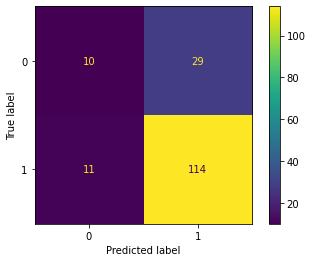

In [54]:
plot_confusion_matrix(model, X_test_fs, y_test)
plt.show()

Feature: 0, Score: 0.01272
Feature: 1, Score: 0.04838
Feature: 2, Score: 0.00297
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02574
Feature: 5, Score: 0.02323
Feature: 6, Score: 0.01903
Feature: 7, Score: 0.02166
Feature: 8, Score: 0.01931
Feature: 9, Score: 0.01568
Feature: 10, Score: 0.00378
Feature: 11, Score: 0.00386
Feature: 12, Score: 0.00360
Feature: 13, Score: 0.00429
Feature: 14, Score: 0.00471
Feature: 15, Score: 0.00246
Feature: 16, Score: 0.00254
Feature: 17, Score: 0.00295
Feature: 18, Score: 0.00487
Feature: 19, Score: 0.00555
Feature: 20, Score: 0.00516
Feature: 21, Score: 0.00395
Feature: 22, Score: 0.00246
Feature: 23, Score: 0.00398
Feature: 24, Score: 0.00411
Feature: 25, Score: 0.00741
Feature: 26, Score: 0.00555
Feature: 27, Score: 0.00524
Feature: 28, Score: 0.00523
Feature: 29, Score: 0.03268
Feature: 30, Score: 0.01564
Feature: 31, Score: 0.00120
Feature: 32, Score: 0.01563
Feature: 33, Score: 0.01952
Feature: 34, Score: 0.00126
Feature: 35, Score: 0.00702
Fe

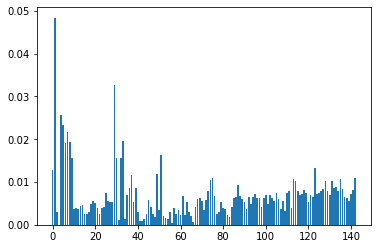

In [55]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 90,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [57]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_fs, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   1.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800;

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [59]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [60]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_fs, y_train)
base_accuracy = evaluate(base_model, X_test_fs, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_fs, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.2926 degrees.
Accuracy = nan%.
Model Performance
Average Error: 0.2951 degrees.
Accuracy = -inf%.
Improvement of nan%.


/tmp/ipykernel_16032/942152569.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
/tmp/ipykernel_16032/942152569.py:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
/tmp/ipykernel_16032/942152569.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [61]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [5, 6, 7, 8, 10, 12],
    'n_estimators': [100, 200, 300, 800 ,1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [62]:
# Fit the grid search to the data
grid_search.fit(X_train_fs, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=1, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV]

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [63]:

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test_fs, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2971 degrees.
Accuracy = nan%.
Improvement of nan%.


/tmp/ipykernel_16032/942152569.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
/tmp/ipykernel_16032/942152569.py:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
